Part 1: Data Exploration – 6 points

Loading the Dataset:
Load the dataset into a Pandas DataFrame and display the first few rows.
Data Types and Missing Values:
Identify the data types of each column and handle missing values if any.
Summary Statistics:
Provide summary statistics for relevant columns.

Tasks:
Use the groupby function to:
Find the average income of customers based on their education level.
Calculate the average amount spent on wines and meat products grouped by marital status.
Use pd.crosstab to:
Examine the distribution of customers based on education and marital status.
Use pivot_table to:
Generate a table showing the average recency of customers, segmented by their number of kids and teens at home.

In [ ]:
# code to read the file from local
import pandas as pd

#Use to import the file into google Colab drive
from google.colab import files

#Use to import io, which opens the file from the Colab drive
import io

# This will open a widget when run that will enable you to browse the files on your local storage drive.
uploaded = files.upload()

# Now use the below code to read the csv in pandas' dataframe
data = pd.read_csv(io.StringIO(uploaded['marketing_campaign.csv'].decode('utf-8')))

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
#First few rows of the loaded dataset
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,39
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,30
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,338
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,79
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,89


In [ ]:
#Data Types and Missing Values

# Display basic information for the dataset provided
print("\nData types of columns:\n", data.dtypes)

# Check for missing values in the dataset
print("\nMissing values:\n", data.isnull().sum())

#The sum of missing values are 0 for all the columns thus need not handle NA


Data types of columns:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Revenue                  int64
dtype: object

Missing values:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       

In [ ]:
#creating a new column age - current year -year_birth
import datetime

#getting the current year
current_year = datetime.datetime.now().year

#Calculate age and create a new column 'Age'
data['Age'] = current_year - data['Year_Birth']

data.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Revenue,Age
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,88,3,8,10,4,7,39,66
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,6,2,1,1,2,5,30,69
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,111,21,42,1,8,2,10,4,338,58
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,10,3,5,2,2,0,4,6,79,39
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,46,27,15,5,5,3,6,5,89,42
5,7446,1967,Master,Together,62513.0,0,1,16,520,42,...,0,42,14,2,6,4,10,6,314,56
6,965,1971,Graduation,Divorced,55635.0,0,1,34,235,65,...,50,49,27,4,7,3,7,6,210,52
7,6177,1985,PhD,Married,33454.0,1,0,32,76,10,...,3,1,23,2,4,0,4,8,64,38
8,4855,1974,PhD,Together,30351.0,1,0,19,14,0,...,3,3,2,1,3,0,2,9,30,49
9,5899,1950,PhD,Together,5648.0,1,1,68,28,0,...,1,1,13,1,1,0,0,20,50,73


In [ ]:
#Statistical summary for relevant columns

numeric_columns = data.select_dtypes(include=['int64', 'float64'])
strinng_columns = data.select_dtypes(include=['object'])
summary_statistics = numeric_columns.describe()
summary_statistics = summary_statistics.drop(["ID","Year_Birth"], axis=1) #Dropping ID from summary statistics

summary_statistics.round(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Revenue,Age
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,52237.98,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,96.11,54.19
std,25037.96,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,96.12,11.98
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,27.00
25%,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,30.00,46.00
50%,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,44.00,53.00
75%,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,137.00,64.00
max,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,527.00,130.00


In [ ]:
#Groupby
#Find the average income of customers based on their education level.
#Calculate the average amount spent on wines and meat products grouped by marital status.

avg_income = data.groupby('Education')['Income'].agg(['mean']).round(2)
print(avg_income)

avg_spending = data.groupby('Marital_Status')[['MntWines','MntMeatProducts']].agg(['mean']).round(2)
print(avg_spending)

                mean
Education           
2n Cycle    47688.58
Basic       20306.26
Graduation  52707.31
Master      52896.78
PhD         56096.30
               MntWines MntMeatProducts
                   mean            mean
Marital_Status                         
Absurd           355.50          312.50
Alone            184.67           26.33
Divorced         324.84          150.21
Married          299.48          160.68
Single           288.33          182.11
Together         306.83          168.10
Widow            369.27          189.29
YOLO             322.00           50.00


In [ ]:
#CrossTab
#Examine the distribution of customers based on education and marital status.
customer_edu_status = pd.crosstab(data['Education'],data['Marital_Status'])
print(customer_edu_status)

Marital_Status  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Education                                                                   
2n Cycle             0      0        23       81      37        57      5   
Basic                0      0         1       20      18        14      1   
Graduation           1      1       119      433     252       286     35   
Master               1      1        37      138      75       106     12   
PhD                  0      1        52      192      98       117     24   

Marital_Status  YOLO  
Education             
2n Cycle           0  
Basic              0  
Graduation         0  
Master             0  
PhD                2  


In [ ]:
#Pivot Table
#Generate a table showing the average recency of customers, segmented by their number of kids and teens at home.
pivot_avg_recency = data.pivot_table(values='Recency', index='Kidhome', columns='Teenhome', aggfunc=('mean')).round(2)

print(pivot_avg_recency)

Teenhome      0      1      2
Kidhome                      
0         49.09  48.49  57.77
1         48.95  48.67  59.09
2         49.18  54.45    NaN


Part 2: Data Visualization – 6 points

Plot a histogram of customer income and discuss the distribution. Comment on your finding
Create a boxplot for the amount spent on different product categories. Comment on your finding.
Generate a correlation heatmap between the numerical features. Identify and comment on a few variables that have high (negative or positive) correlation with "Revenue".


In [ ]:
df = data.copy()

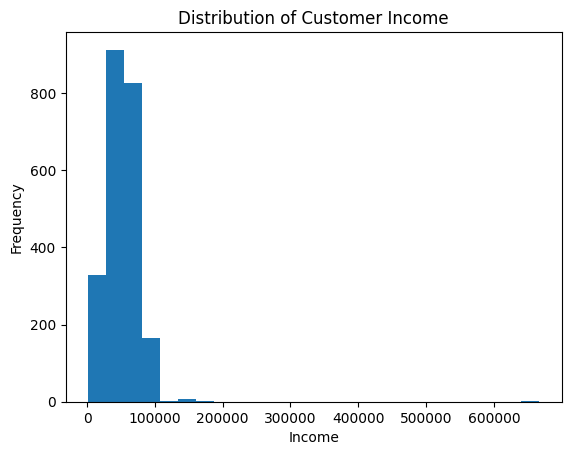

In [ ]:
# 1. Histogram of customer income
import matplotlib.pyplot as plt
plt.hist(df['Income'], bins=25)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Income')
plt.show()

# The distribution is right-skewed, with most customers having relatively low-medium income and fewer customers with very high income.


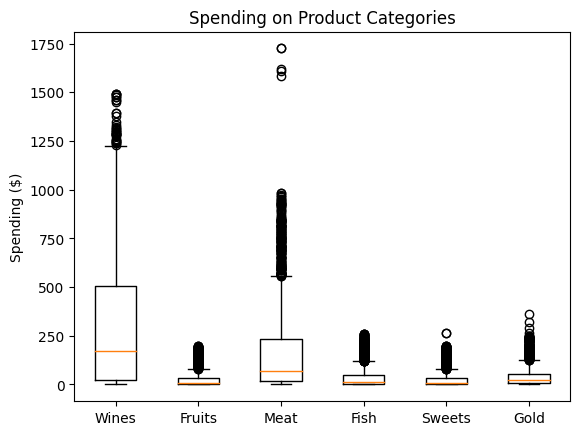

In [ ]:

# 2. Boxplot of spending by product category
plt.boxplot([df['MntWines'], df['MntFruits'], df['MntMeatProducts'],
             df['MntFishProducts'], df['MntSweetProducts'], df['MntGoldProds']])
plt.xticks([1,2,3,4,5,6], ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
plt.ylabel('Spending ($)')
plt.title('Spending on Product Categories')
plt.show()

# The plot shows wine and fruits have the highest median spending, while gold products have the lowest. Wines and sweets have larger spreads.

<ipython-input-12-72a6157af3e8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


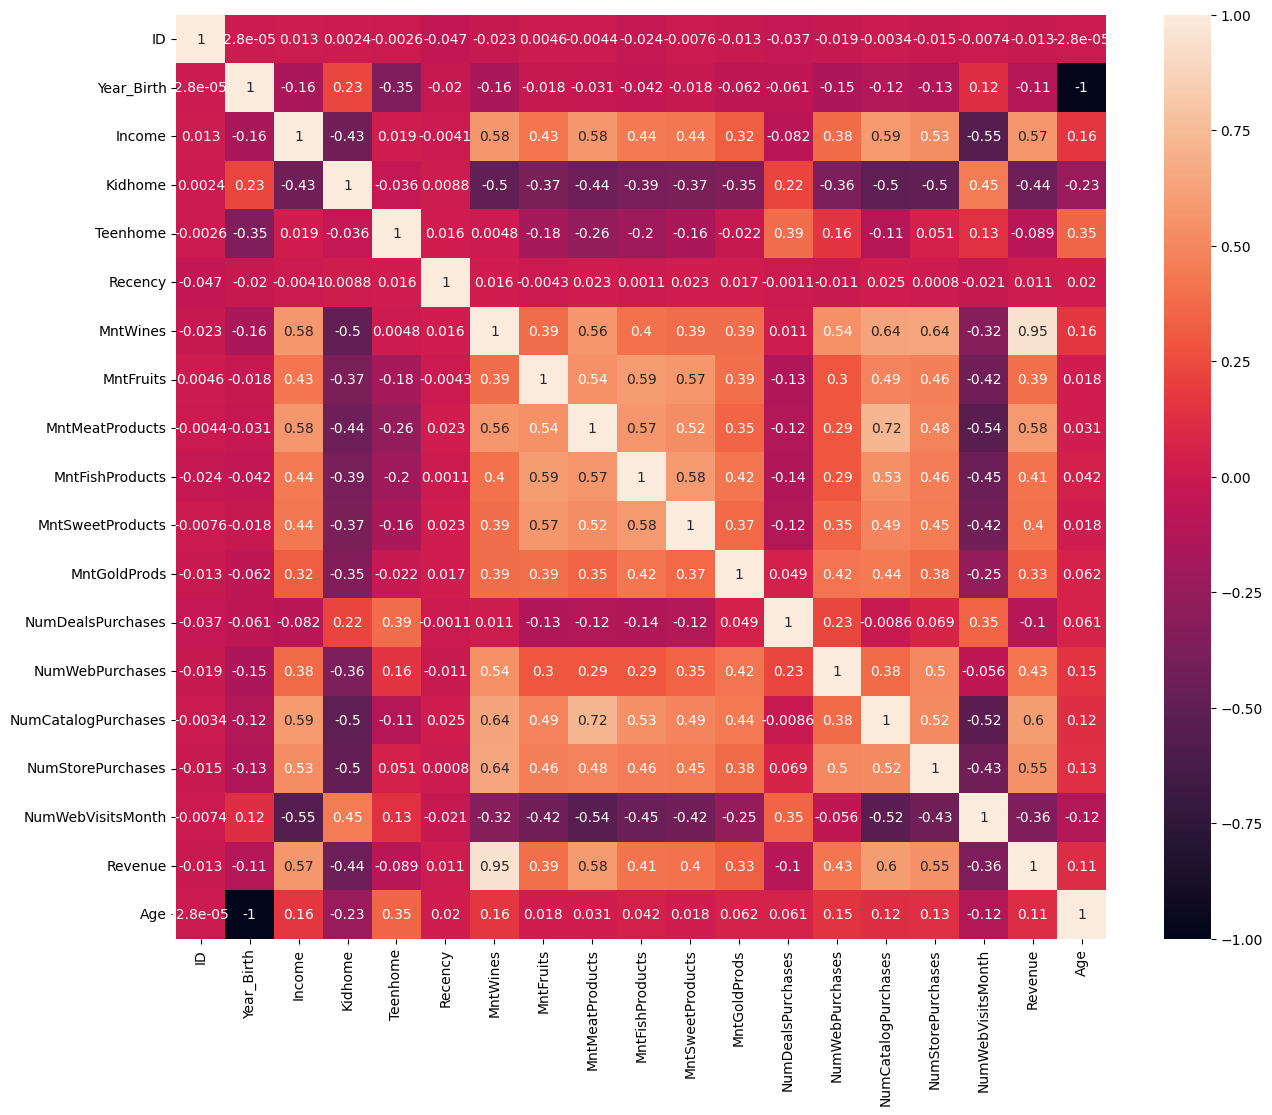

In [ ]:

# 3. Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

# 'MntWines', 'MntFruits', 'MntFishProducts','MntMeatProducts' have high positive correlation with 'Revenue'.
# 'Kidhome','Year_Birth' has high negative correlation with 'Revenue'.


Part 3: Linear Regression Analysis (Explanatory) – 7.5 points

Fit a linear regression model to identify the impact of various factors on the synthetic "Revenue" column.
Evaluate the model and interpret the coefficients. Pay special attention to the significance of each coefficient.

In [ ]:
# 1. Fit linear regression model
import statsmodels.formula.api as smf
exp_model = smf.ols(formula='Revenue ~ Age + Income + Kidhome + Teenhome + Recency +MntWines+ MntFruits + MntMeatProducts+ MntFishProducts +MntSweetProducts+MntGoldProds  + NumDealsPurchases+ NumWebPurchases +NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth+ C(Education) + C(Marital_Status)', data = df).fit()
#Using only one of Mnt

# 2. Evaluate model and interpret coefficients
print(exp_model.summary())

# 'Income', 'MntWines', and 'MntFruits' have significant positive coefficients,
# indicating positive association with Revenue. 'Year_Birth' has significant negative coefficient, indicating inverse relation.

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1192.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:07:13   Log-Likelihood:                -10331.
No. Observations:                2240   AIC:                         2.072e+04
Df Residuals:                    2212   BIC:                         2.088e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

##Evaluate the model and interpret the coefficients:

 The R-squared for the model is 0.936. This implies that the model almost perfectly fits the data. This model has explanatory power.

 Around 93.6% variance in the revenue can be explained using the variance in the factors used in the above model.

 #### **Choosing 5 random coefficients to interpret the model:**

 The five coefficients are:
 1. Marital Status(T.Alone)
 2. Income
 3. Kid Home
 4. Recency
 5. Education(T.Graduation)

 **Marital Status(T.Alone):**
 The coefficient value is 22.4513, the p-value is 0.994.

 We can infer from this that a perosn whose marital status is alone is expected to buy for $22.5 more in compared to a person whose marital status is Absurd.

 The P-value is greater than the significance level of 0.05. This shows that this relationsip is NOT expected to hold in the population, although it seems to hold in the sample data.

 **Income:**
 The coefficient value is 0.0001, the p-value is 0.000.

 We can infer from this that an increase in the income by 10,000 dollars would result in the increase in purchase by $1 with the current marketing campaign.

 The P-value is lesser than the significance level of 0.05. This shows that this relationsip is expected to hold in the population and not just in the sample data.

 **Kid Home:**
 The coefficient value is 11.0385, the p-value is 0.000.

 We can infer from this with every extra child in the house the customer is to make an additonal of $11 dollars woth purchase with the current marketing campaign.

 The P-value is lesser than the significance level of 0.05. This shows that this relationsip is expected to hold in the population and not just in the sample data.

**Recency:**
The coefficient value is -0.0255, the p-value is 0.157.

 We can infer from this with a gap of 100 days (approximately 3 months) between two purchases reduces the amount purchased by the customer by $2.55 with the current marketing campaign.

 The P-value is greater than the significance level of 0.05. This shows that this relationsip is NOT expected to hold in the population, although it seems to hold in the sample data.

 **Education(T.Graduation):**
 The coefficient value is -3.7460, the p-value is 0.047.

 We can infer from this that an customer with whose level of education is 2n cycle would spend approximately $4 more than a customer with a graduation degree.  

 The P-value is almost same as the significance level of 0.05. This shows that this relationsip is expected to hold in the population and not just in the sample data.


Removing some insignificant variables have no detectable linear relationship with Revenue P>0.05

In [ ]:
model2 = smf.ols('Revenue ~ Age + Kidhome + MntMeatProducts + MntWines' , data=df).fit()

#Using only one of Mnt

# 2. Evaluate model and interpret coefficients
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     5696.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:07:37   Log-Likelihood:                -10700.
No. Observations:                2240   AIC:                         2.141e+04
Df Residuals:                    2235   BIC:                         2.144e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.3446      3.221     

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
correlation_matrix = df[['Age', 'Kidhome', 'MntMeatProducts', 'MntWines']].corr()


In [ ]:
correlation_matrix

,Age,Kidhome,MntMeatProducts,MntWines
Age,1.000000,-0.230176,0.030872,0.157773
Kidhome,-0.230176,1.000000,-0.437129,-0.496297
MntMeatProducts,0.030872,-0.437129,1.000000,0.562667
MntWines,0.157773,-0.496297,0.562667,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have your independent variables in a DataFrame called 'X'
X = df[['Year_Birth','Kidhome','MntMeatProducts',	'MntWines']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]



Part 4: Predictive Modeling – 7.5 points

Split the data into training and test sets.
Fit a predictive model of your choice to predict "Revenue".
Make predictions on the test dataset.
Report the predictive performance using metrics like RMSE, R-squared, etc.

In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.8 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = data.drop(columns=['Revenue'])
y = data['Revenue']

X = pd.get_dummies(X, drop_first =True) # Dummy coding any categoricla variables.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 548.2681448013489
R-squared: 0.9421442192879061


In [ ]:
#Importing the library
from dmba.metric import regressionSummary
import numpy as np

#predictions
train_predictions = model.predict(X_train)

test_predictions = model.predict(X_test)

#Regression summary - train
regressionSummary(y_train, train_predictions)

#Regression summary - test
regressionSummary(y_test, test_predictions)

#Calculating errors
train_errors = y_train - train_predictions

test_errors = y_test - test_predictions

#ME,MAE,RMSE - train
train_ME = round(np.mean(train_errors), 2)
train_MAE = round(np.mean(abs(train_errors)), 2)
train_RMSE = round(np.sqrt(np.mean(train_errors*train_errors)), 2)

train_metrics =  [train_ME, train_MAE, train_RMSE]

#ME,MAE,RMSE - test
test_ME = round(np.mean(test_errors), 2)
test_MAE = round(np.mean(abs(test_errors)), 2)
test_RMSE = round(np.sqrt(np.mean(test_errors*test_errors)),2)

test_metrics =  [test_ME, test_MAE, test_RMSE]

#model performance
predictive_model_performance = pd.DataFrame({"Train": train_metrics, "Test": test_metrics})
predictive_model_performance

#there is no under or overfitting as RMSE in both the test and train models are similar.


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 24.6354
            Mean Absolute Error (MAE) : 16.3927
          Mean Percentage Error (MPE) : -1.5769
Mean Absolute Percentage Error (MAPE) : 24.4590

Regression statistics

                      Mean Error (ME) : -0.0294
       Root Mean Squared Error (RMSE) : 23.4151
            Mean Absolute Error (MAE) : 16.5031
          Mean Percentage Error (MPE) : -1.4415
Mean Absolute Percentage Error (MAPE) : 22.7859


,Train,Test
0,0.00,-0.03
1,16.39,16.50
2,24.64,23.42
